# Case Descriptions

## ROCOF based methods

0.4 pu load ramping on Bus 12 in Area 1

 - _Case 1_: No inertia emulation at all
 - _Case 2_: Power Sharing between areas (VSC 1 and 2 local inertia emulation enabled, VSC 2 dc droop enabled)
 - _Case 3_: WTG inertia response (VSC 2 inertia emulation, WTGs IE enabled)
 - _Case 4_: Area power sharing with WTG inertial response (VSC 1 and 2 inertia emulation enabled. Observe inadequate responses from WTGs)
 - _Case 5_: Adequate inertial response from WTGs (additional frequency information from grid areas)

Load Ramping in Area 1

   

In [1]:
%matplotlib inline

import os

from matplotlib import pyplot

from andes.plot import main as andesplot
from andes.plot import read_dat, read_label, do_plot, add_plot

import seaborn as sns

from cycler import cycler

import numpy as np

sns.set()

In [2]:
datfile = ['case1_out.dat', 'case2_out.dat', 'case3_out.dat', 'case4_out.dat', ]
lstfile = ['case1_out.lst', 'case2_out.lst', 'case3_out.lst', 'case4_out.lst', ]

In [3]:
def aio_plot(datfile, lstfile, x_idx, y_idx, ylabel=None, legend=None, ytimes=1, savefig=None, **kwargs):
    xl, xv, yl, yv = list(), list(), list(), list()
    
    for i in range(len(datfile)):
        dat = datfile[i]
        lst = lstfile[i]
        tmp1, tmp2 = read_dat(datfile[i], x_idx, y_idx)
        xv.append(tmp1)
        yv.append(tmp2)
        
        tmp1, tmp2 = read_label(lstfile[i], x_idx, y_idx)
        xl.append(tmp1)
        yl.append(tmp2)
    
    for i in range(len(yv)):
        for j in range(len(yv[i])):
            for k in range(len(yv[i][j])):
                yv[i][j][k] = yv[i][j][k] * ytimes
    
    fig, ax = do_plot(xv[0], yv[0], xl[0], yl[0], grid=True, noshow=True)

    linestyle = ['-', '--', ':', '-.'] * len(y_idx)
    
    for i in range(1, len(datfile)):
        add_plot(xv[i], yv[i], xl[i], yl[i], fig, ax, linestyle=linestyle[i], LATEX=True)
    
    if ylabel:
        ax.set_ylabel(ylabel)
    
    if legend:
        ax.legend(legend)
    
    if savefig:
        pyplot.savefig(savefig)
    
    return fig, ax

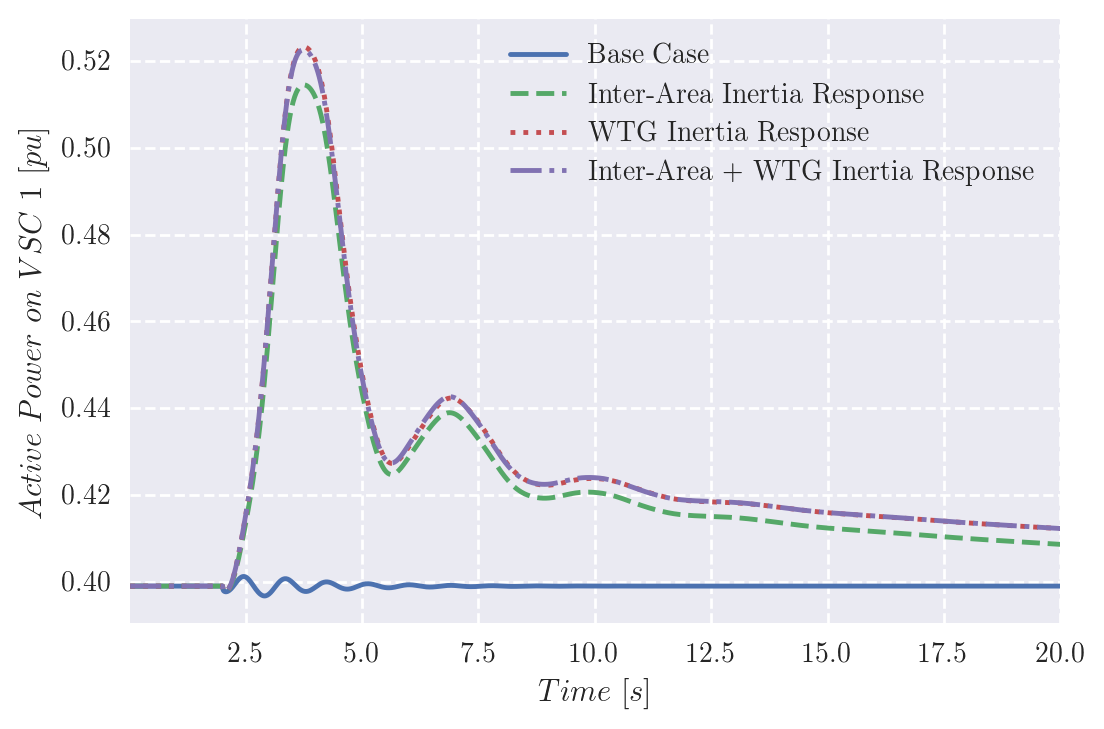

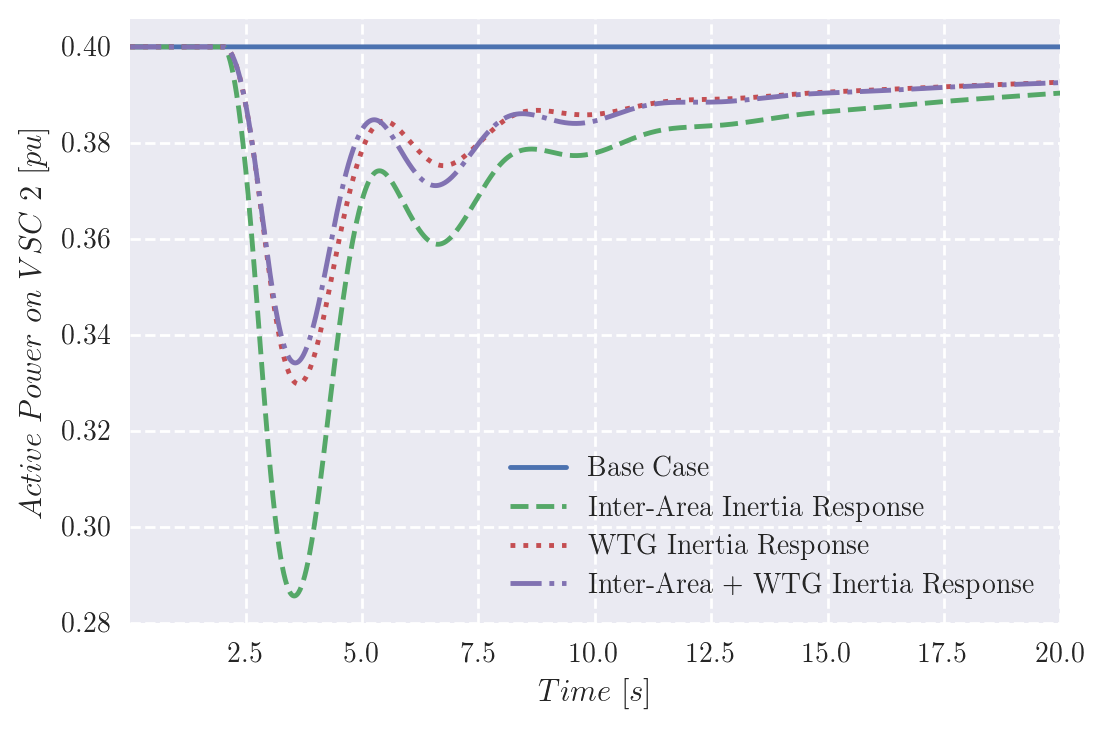

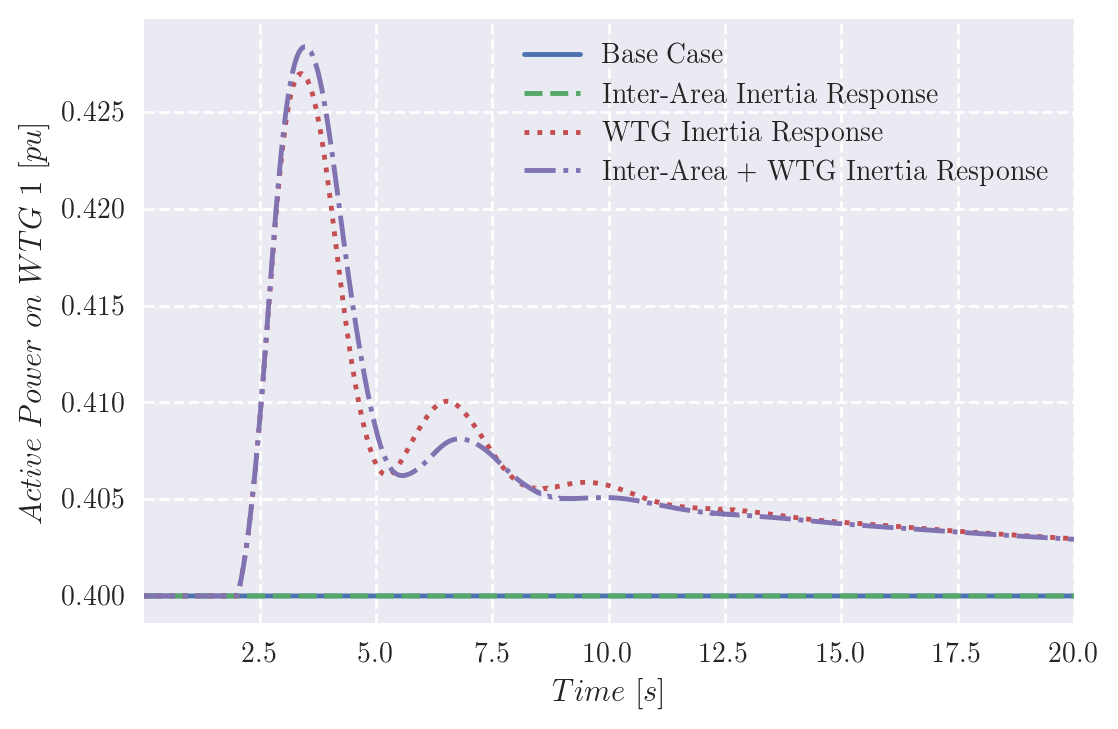

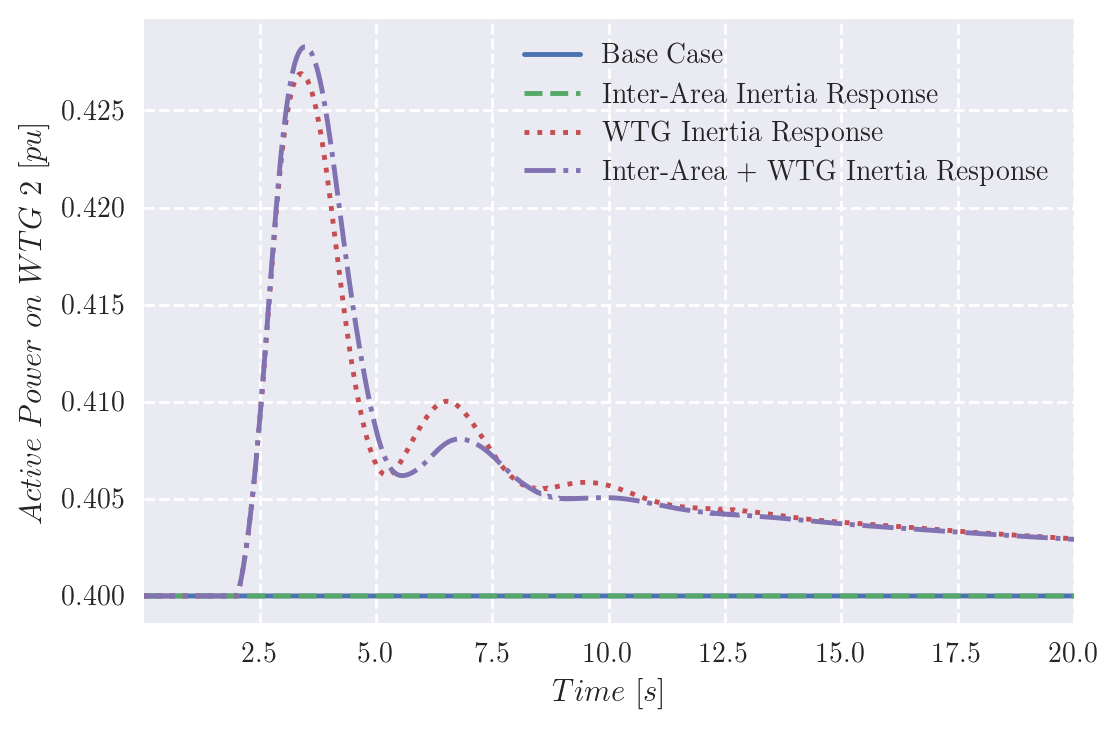

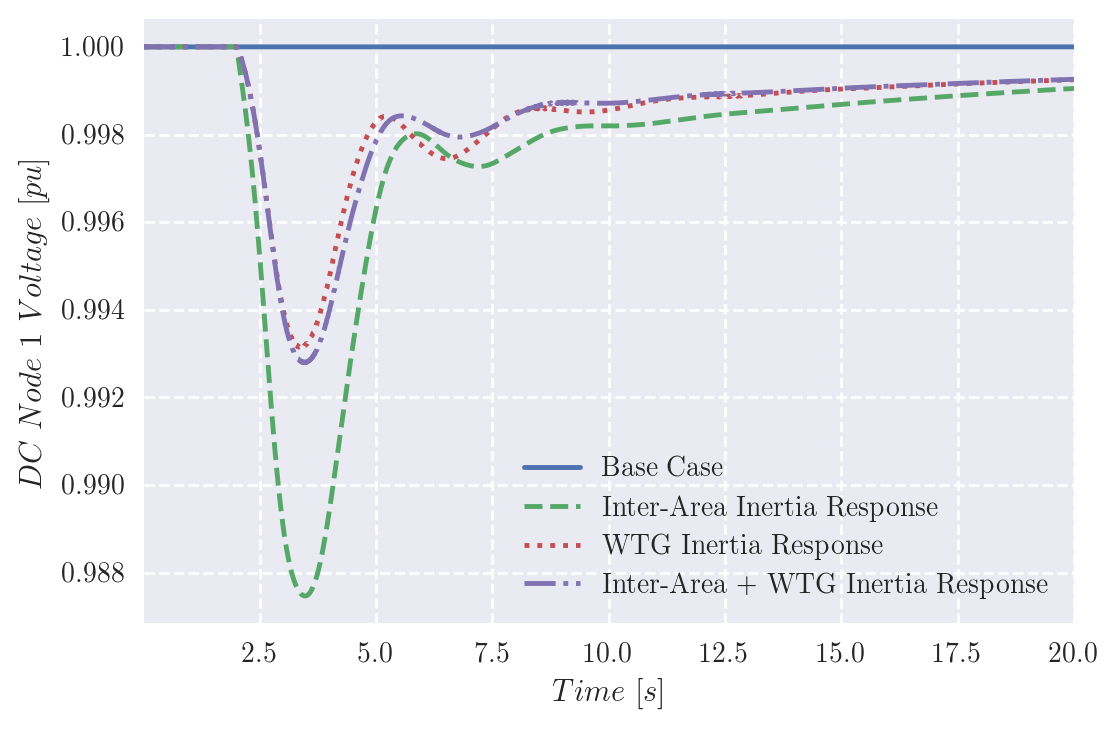

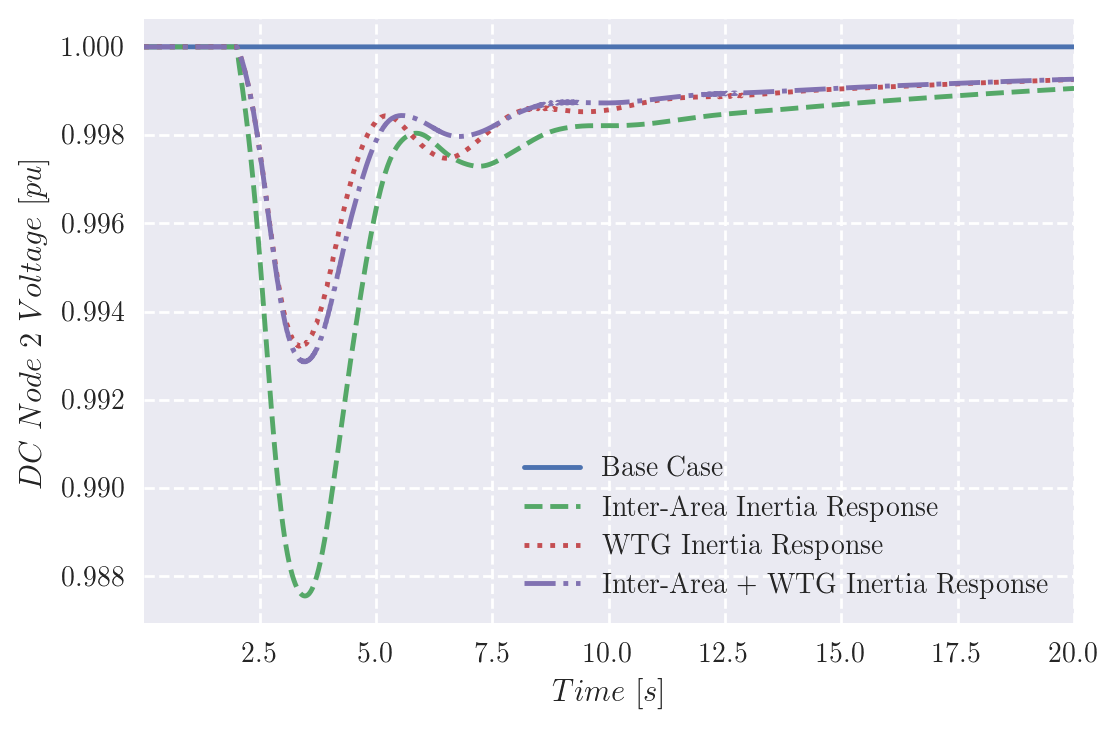

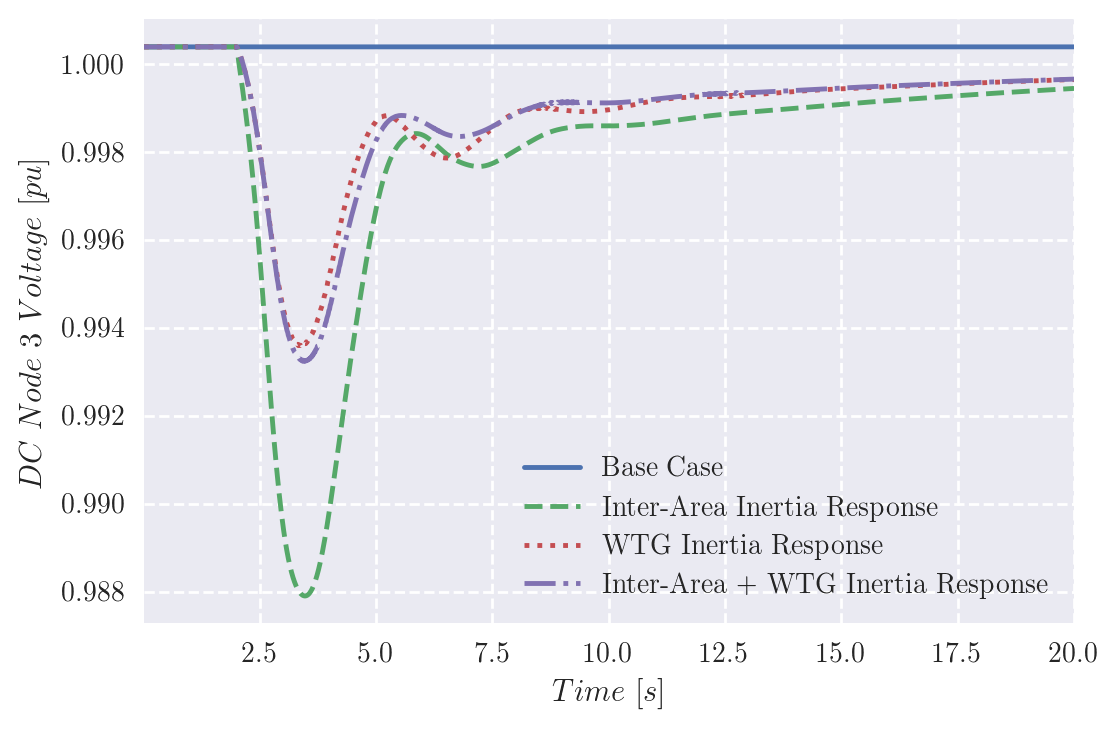

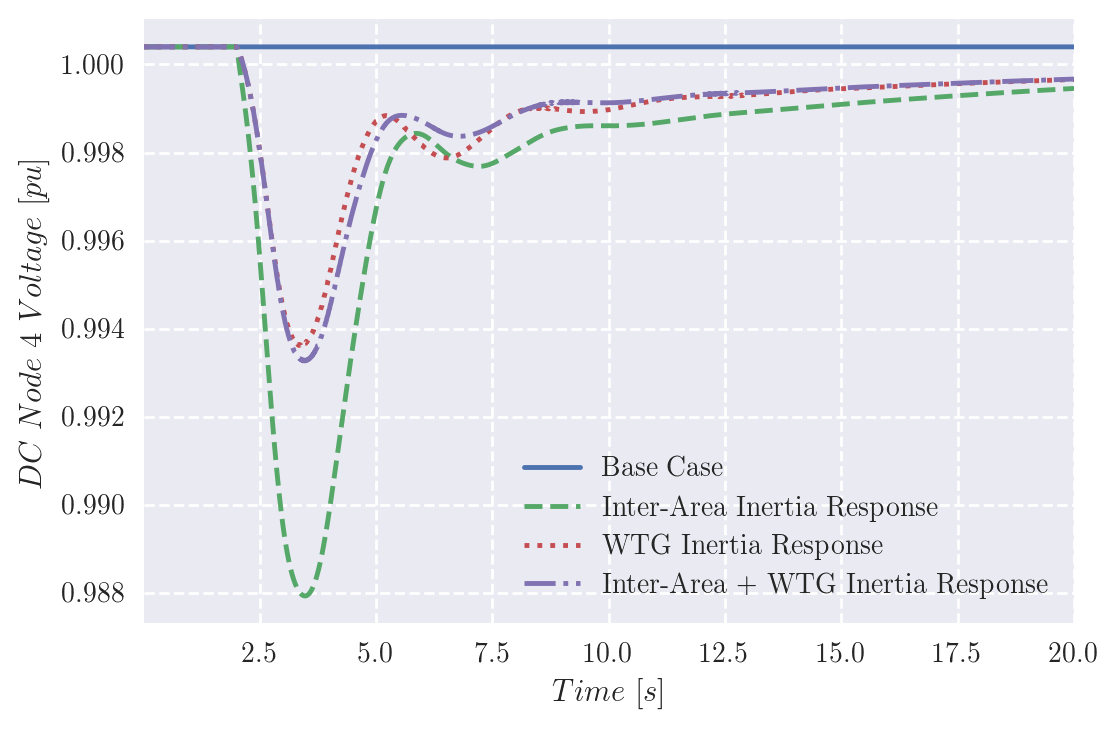

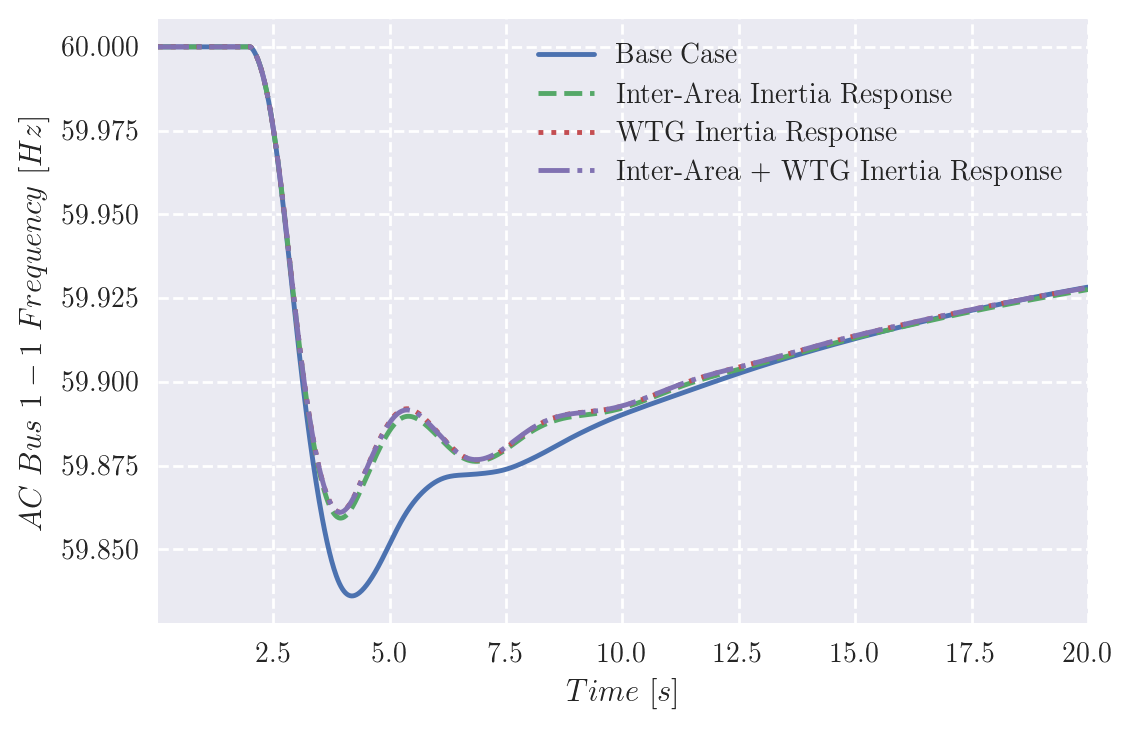

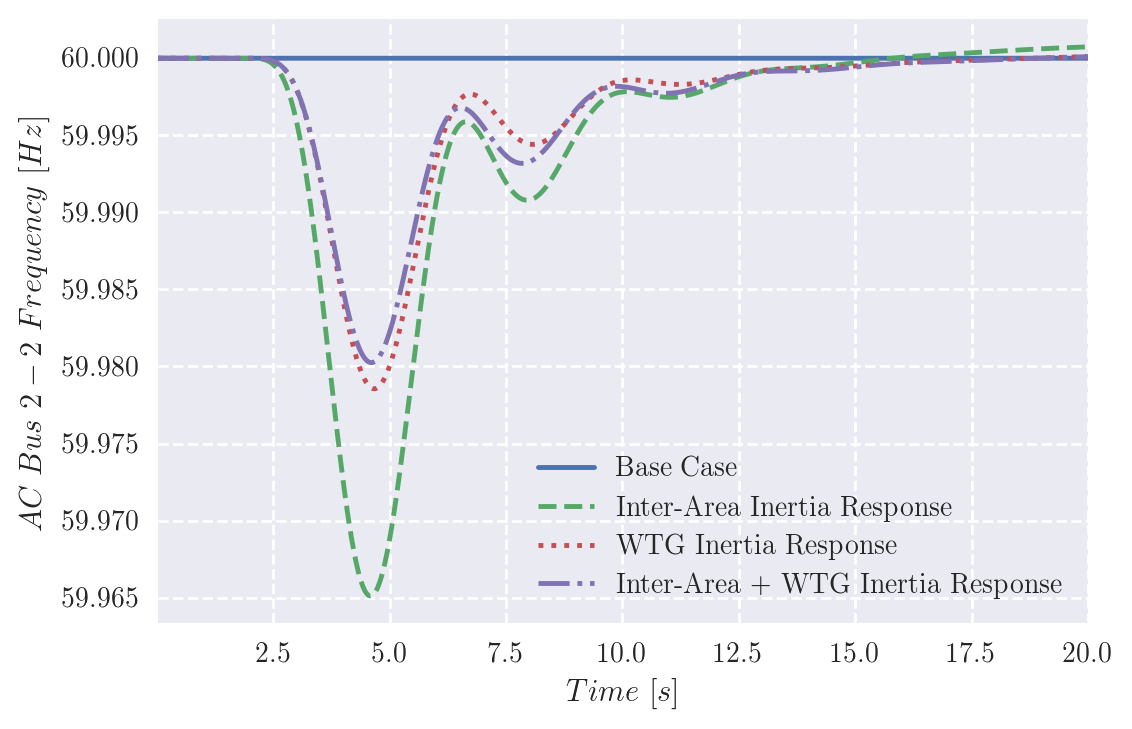

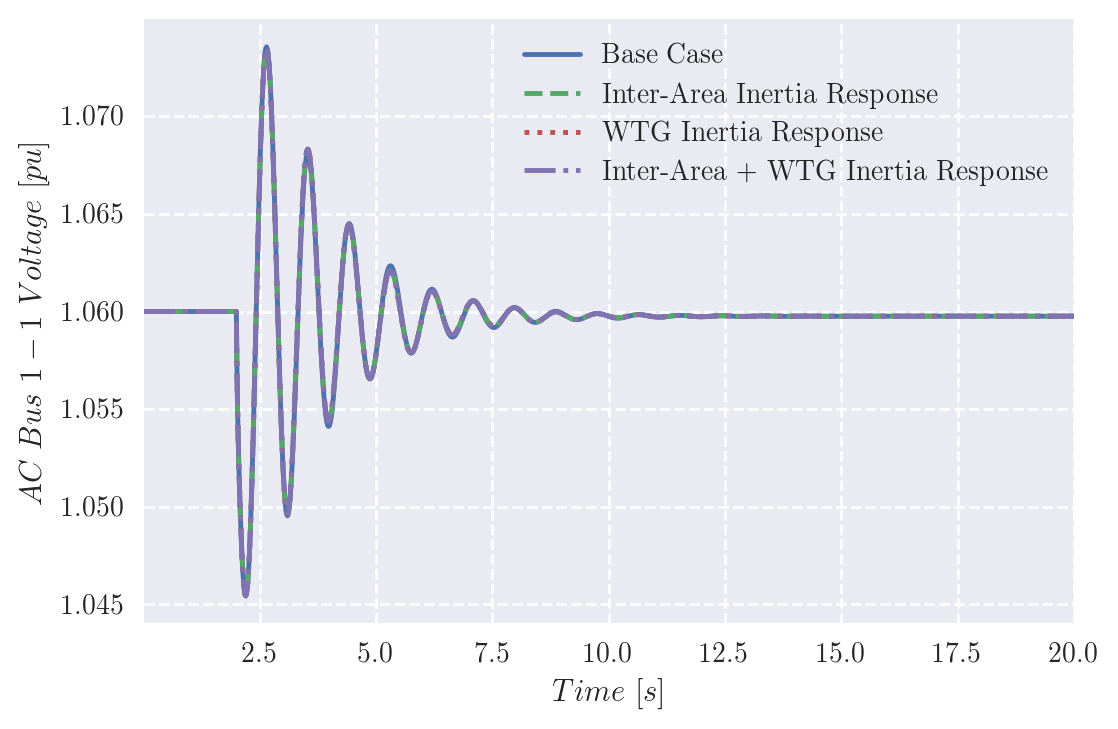

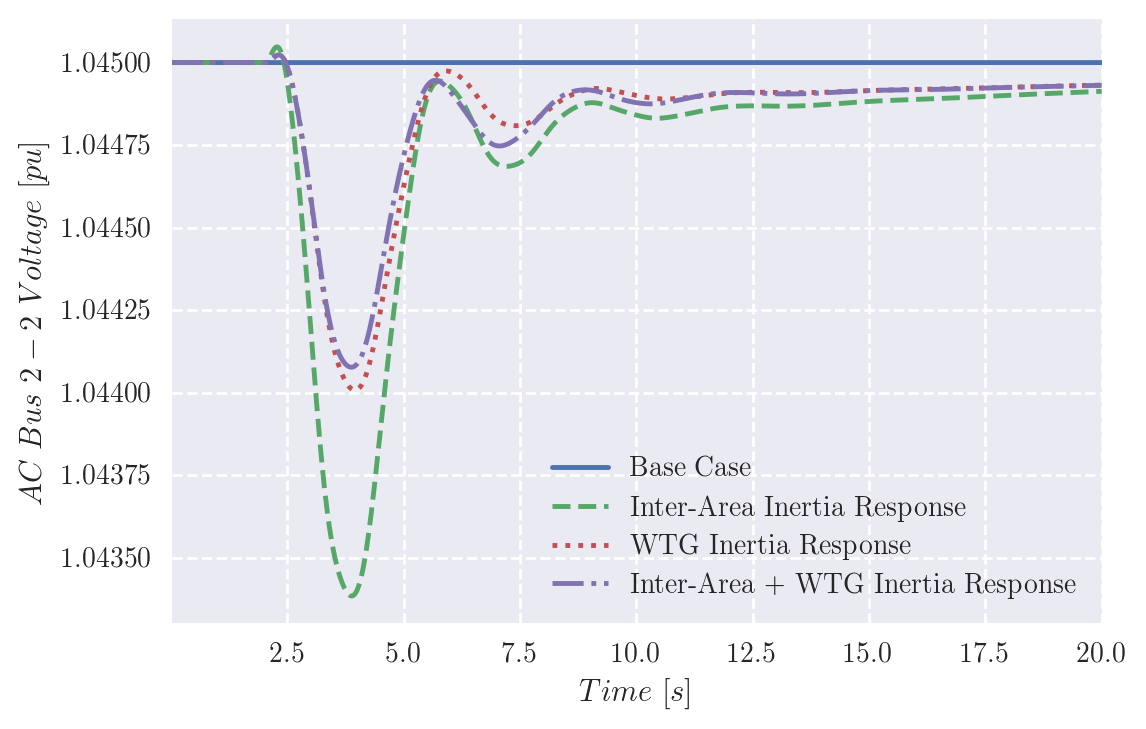

In [7]:
x_idx = [0]

legend = ['Base Case', 'Inter-Area Inertia Response', 'WTG Inertia Response', 'Inter-Area + WTG Inertia Response']


p_VSC1 = [507]
fig, ax = aio_plot(datfile, lstfile, x_idx, p_VSC1, legend=legend, ylabel='$Active\ Power\ on\ VSC\ 1\ [pu]$', savefig='pdf/area1_p_vsc1.pdf')

p_VSC2 = [518]
fig, ax = aio_plot(datfile, lstfile, x_idx, p_VSC2, legend=legend, ylabel='$Active\ Power\ on\ VSC\ 2\ [pu]$', savefig='pdf/area1_p_vsc2.pdf')

p_WIND1 = [486]
fig, ax = aio_plot(datfile, lstfile, x_idx, p_WIND1, legend=legend, ylabel='$Active\ Power\ on\ WTG\ 1\ [pu]$', savefig='pdf/area1_p_wind1.pdf')

p_WIND2 = [496]
fig, ax = aio_plot(datfile, lstfile, x_idx, p_WIND2, legend=legend, ylabel='$Active\ Power\ on\ WTG\ 2\ [pu]$', savefig='pdf/area1_p_wind2.pdf')

Vdc1 = [291]
fig, ax = aio_plot(datfile, lstfile, x_idx, Vdc1, legend=legend, ylabel='$DC\ Node\ 1\ Voltage\ [pu]$', savefig='pdf/area1_Vdc1.pdf')

Vdc2 = [292]
fig, ax = aio_plot(datfile, lstfile, x_idx, Vdc2, legend=legend, ylabel='$DC\ Node\ 2\ Voltage\ [pu]$', savefig='pdf/area1_Vdc2.pdf')

Vdc3 = [293]
fig, ax = aio_plot(datfile, lstfile, x_idx, Vdc3, legend=legend, ylabel='$DC\ Node\ 3\ Voltage\ [pu]$', savefig='pdf/area1_Vdc3.pdf')

Vdc4 = [294]
fig, ax = aio_plot(datfile, lstfile, x_idx, Vdc4, legend=legend, ylabel='$DC\ Node\ 4\ Voltage\ [pu]$', savefig='pdf/area1_Vdc4.pdf')

Freq1 = [10]
fig, ax = aio_plot(datfile, lstfile, x_idx, Freq1, legend=legend, ytimes=60, ylabel='$AC\ Bus\ 1-1\ Frequency\ [Hz]$', savefig='pdf/area1_freq1.pdf')

Freq2 = [55]
fig, ax = aio_plot(datfile, lstfile, x_idx, Freq2, legend=legend, ytimes=60, ylabel='$AC\ Bus\ 2-2\ Frequency\ [Hz]$', savefig='pdf/area1_freq2.pdf')

Vac1 = [262]
fig, ax = aio_plot(datfile, lstfile, x_idx, Vac1, legend=legend, ylabel='$AC\ Bus\ 1-1\ Voltage\ [pu]$', savefig='pdf/area1_Vac1.pdf')

Vac2 = [277]
fig, ax = aio_plot(datfile, lstfile, x_idx, Vac2, legend=legend, ylabel='$AC\ Bus\ 2-2\ Voltage\ [pu]$', savefig='pdf/area1_p_Vac2.pdf')